# A Bayesian Perspective on Pharmacometrics: Understanding the Hierarchical Structure

Pharmacometrics traditionally relies on nonlinear mixed-effects models to quantify variability in the dose-exposure-response process across individuals. These models are foundational to tools like NONMEM, nlmixr, or Phoenix NLME. But what if we step back and reframe this modeling process through the lens of Bayesian statistics?

Let's start with a graphical model.

<Axes: >

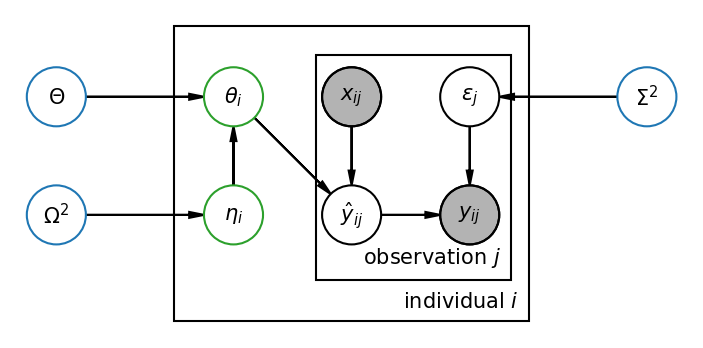

In [223]:
import daft

pgm = daft.PGM()
color_b = {'ec': 'C0'}
color_g = {'ec': 'C2'}
# population parameter nodes: POP_PARAM, IIV, RUV
pgm.add_node('pop', r'$\Theta$', -0.5, 5, plot_params=color_b)
pgm.add_node('iiv', r'$\Omega^2$', -0.5, 4, plot_params=color_b)
pgm.add_node('ruv', r'$\Sigma^2$', 4.5, 5, plot_params=color_b)

# individual parameters
pgm.add_node('eta', r'$\eta_i$', 1, 4, plot_params=color_g)
pgm.add_node('ind', r'$\theta_i$', 1, 5, plot_params=color_g)

pgm.add_node('res', r'$\epsilon_j$', 3, 5)

# individual prediction
pgm.add_node('y_hat', r'$\hat{y}_{ij}$', 2, 4)

# indvidual observations
pgm.add_node('y', r'$y_{ij}$', 3, 4, observed=True)

# model input
pgm.add_node('x', r'$x_{ij}$', 2, 5, observed=True)

# edges
pgm.add_edge('pop', 'ind')
pgm.add_edge('iiv', 'eta')
pgm.add_edge('eta', 'ind')
pgm.add_edge('ind', 'y_hat')
pgm.add_edge('x', 'y_hat')
pgm.add_edge('y_hat', 'y')
pgm.add_edge('ruv', 'res')
pgm.add_edge('res', 'y')

# plate for individuals
pgm.add_plate(plate=(0.5, 3.1, 3., 2.5), label="individual $i$", position="bottom right")
pgm.add_plate(plate=(1.7, 3.45, 1.65, 1.9), label="observation $j$", position="bottom right")
pgm.render(dpi=150)

This diagram is a directed acyclic graph (DAG), offering a clear view of how population parameters, individual parameters, random effects, and observed data are interconnected. This is the essence of Bayesian hierarchical modeling.

## Components of the DAG
Each node in the graph represents a variable, and arrows denote dependencies. Let's break this down:

### Population-Level Parameters (Blue Nodes)
- $\Theta$: the typical values for the population parameters, e.g., clearance (CL), volume of distribution (V), etc.
- $\Omega$: the variance-covariance matrix of inter-individual variability (IIV) and inter-occasion variability (IOV), which captures how indviduals deviate from the population mean or how occasions differ from each other.
- $\Sigma$: the variance of residual error, which describes the unexplained variability in the observed data

### Individual-Level Parameters (Green Nodes)
- $\eta_i$: individual random effects, which represent deviations of individual parameters from the population mean. These are typically assumed to follow a multivariate normal distribution with mean zero and variance $\Omega$.
- $\theta_i$: individual parameters, which are derived as function of the population parameters and the individual random effects. For example, $\theta_i = \Theta * \exp(\eta_i)$.

### Observation-Level (Black Nodes)
- $x_{ij}$: observed data for individual i at time point j, including dose, covariates.
- $\epsilon_{j}$: residual error, which captures the difference between the observed data and the model prediction. This is typically assumed to follow a normal distribution with mean zero and variance $\Sigma$.
- $\hat{y}_{ij}$: model prediction for individual i at time point j
- $y_{ij}$: the observed outcome, e.g., concentration, response, etc.


In future posts, I'll build full Bayesian models for commonly used pharmacometric models, such as one compartment and two compartment models, using NumPyro. This will allow us to explore the flexibility and power of Bayesian modeling in pharmacometrics, including the ability to incorporate prior knowledge, handle missing data, and quantify uncertainty in parameter estimates.

Bayesian modeling offers a powerful, transparent, and flexible framework for understanding the complexities of pharmacometric model. By viewing these models through a probabilistic lens, we are not just estimating parameters -- we are modeling all the unknowns as probabilistic distributions over plausible realities. The DAG above serves as a blueprint for this process, illustrating how we can systematically account for variability and uncertainty at every level of the modeling hierarchy.